In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

# Set the style for our visualizations
sns.set_style("whitegrid")
sns.set_palette("deep")

%matplotlib inline

In [3]:
import pandas as pd

# inladen zonder kolomnamen
df = pd.read_csv("GSE96058_expression_matrix_3decimals_new.tsv", sep="\t", header=None)
df=df.T

# eerste rij = kolomnamen
df.columns = df.iloc[0]
df = df.iloc[1:]

# eerste kolom = sample namen
first_col = df.columns[0]
df = df.set_index(first_col)

df.head()


C:\Users\ecomab\AppData\Local\Temp\ipykernel_12352\281034824.py:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

,5_8S_rRNA,5S_rRNA,6M1-18,7M1-2,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Gene,,,,,,,,,,,,,,,,,,,,,
F1,-3.322,4.911,-3.322,-3.322,-0.539,0.598,-1.353,-3.214,6.172,-1.585,...,1.108,3.045,1.641,2.425,3.244,-0.412,1.469,6.282,1.774,2.437
F2,-3.322,-3.322,-3.322,-3.322,-0.577,2.364,-0.779,-3.054,7.114,-2.329,...,1.678,2.744,0.684,1.862,2.727,-0.453,1.925,7.17,1.764,2.876
F3,-3.322,-3.322,-3.322,-3.322,-1.651,2.648,0.085,-3.322,5.642,-2.222,...,2.443,4.72,-0.16,1.365,3.122,0.594,1.619,6.683,2.039,2.929
F4,-3.322,3.656,-3.322,-3.322,0.127,1.379,-0.334,-3.322,7.237,-1.412,...,2.442,4.157,1.036,2.039,3.183,-0.047,1.969,6.666,2.772,2.778
F5,-3.322,4.19,-3.322,-3.322,0.784,2.76,0.985,-3.322,7.508,-0.135,...,1.749,1.025,1.148,2.033,3.589,0.809,2.998,6.479,2.696,3.957


In [4]:
dfmeta = pd.read_csv("GSE96058_metadata.txt", sep="\t")

df
dfmeta.columns

Index(['sample_id', 'title', 'geo_accession', 'type', 'channel_count',
       'source_name_ch1', 'age at diagnosis:ch1', 'chemo treated:ch1',
       'endocrine treated:ch1', 'er prediction mgc:ch1',
       'er prediction sgc:ch1', 'er status:ch1', 'her2 prediction mgc:ch1',
       'her2 prediction sgc:ch1', 'her2 status:ch1', 'instrument model:ch1',
       'ki67 prediction mgc:ch1', 'ki67 prediction sgc:ch1', 'ki67 status:ch1',
       'lymph node group:ch1', 'lymph node status:ch1',
       'nhg prediction mgc:ch1', 'nhg:ch1', 'overall survival days:ch1',
       'overall survival event:ch1', 'pam50 subtype:ch1',
       'pgr prediction mgc:ch1', 'pgr prediction sgc:ch1', 'pgr status:ch1',
       'scan-b external id:ch1', 'tumor size:ch1'],
      dtype='object')

In [5]:
dfmeta = dfmeta.set_index("title")
dfmeta.index.name = None
# check dat de indexen overeenkomen
print(df.index[:5])
print(dfmeta.index[:5])

# merge expressie + metadata
combined = df.join(dfmeta, how="inner")
combined.head()

Index(['F1', 'F2', 'F3', 'F4', 'F5'], dtype='object', name='Gene')
Index(['F1', 'F2', 'F3', 'F4', 'F5'], dtype='object')


,5_8S_rRNA,5S_rRNA,6M1-18,7M1-2,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,...,nhg prediction mgc:ch1,nhg:ch1,overall survival days:ch1,overall survival event:ch1,pam50 subtype:ch1,pgr prediction mgc:ch1,pgr prediction sgc:ch1,pgr status:ch1,scan-b external id:ch1,tumor size:ch1
F1,-3.322,4.911,-3.322,-3.322,-0.539,0.598,-1.353,-3.214,6.172,-1.585,...,G3,G3,2367,0,Basal,0,0,NaN,Q008818.C008840.S000215.l.r.m2.c.lib.g.k.a.t,9.0
F2,-3.322,-3.322,-3.322,-3.322,-0.577,2.364,-0.779,-3.054,7.114,-2.329,...,G2,G2,2367,0,LumA,1,1,1.0,Q008769.C008792.S000250.l.r.m.c.lib.g.k.a.t,14.0
F3,-3.322,-3.322,-3.322,-3.322,-1.651,2.648,0.085,-3.322,5.642,-2.222,...,G3,G3,2168,1,LumB,1,1,1.0,Q008568.C008577.S000424.l.r.m3.c.lib.g.k.a.t,27.0
F4,-3.322,3.656,-3.322,-3.322,0.127,1.379,-0.334,-3.322,7.237,-1.412,...,G3,G3,2416,0,LumA,1,1,NaN,Q008909.C009000.S000084.l.r.m.c.lib.g.k.a.t,51.0
F5,-3.322,4.19,-3.322,-3.322,0.784,2.76,0.985,-3.322,7.508,-0.135,...,G2,G2,2389,0,Normal,1,1,NaN,Q008781.C008782.S000260.l.r.m.c.lib.g.k.a.t,60.0


In [6]:
combined = combined.drop(columns=["ki67 status:ch1"])

In [8]:
from sklearn.impute import KNNImputer

numeric_cols = combined.select_dtypes(include=['float64','int64']).columns
categorical_cols = combined.select_dtypes(exclude=['float64','int64']).columns

imputer = KNNImputer(n_neighbors=5)
combined[numeric_cols] = imputer.fit_transform(combined[numeric_cols])

In [63]:
genes_A = ["ESR1"]


# ground truth = pathologist ER status
y = combined["er status:ch1"]

In [12]:
import numpy as np

# alleen duidelijke ER-neg (0.0) en ER-pos (1.0)
mask = combined["er status:ch1"].isin([0.0, 1.0])

combined_bin = combined.loc[mask].copy()
y = combined_bin["er status:ch1"].astype(int)

print("Unieke waarden in y:", y.unique())
print("Aantal samples:", len(y))

Unieke waarden in y: [1 0]
Aantal samples: 3003


Aantal ESR1-outliers: 354


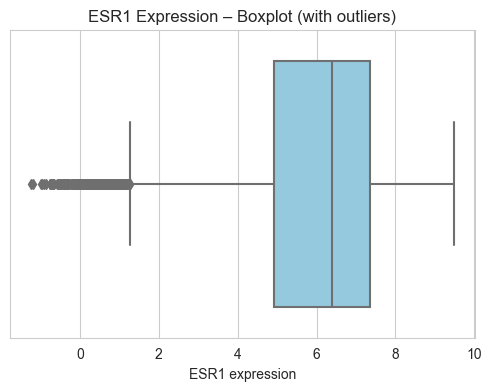

In [57]:
esr = df["ESR1"]  # blijft dezelfde index houden

# IQR
Q1 = esr.quantile(0.25)
Q3 = esr.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Gebruik esr[...] en *niet* df[(esr ...)]
mask = (esr < lower) | (esr > upper)

outliers_esr = df.loc[mask]   # loc = veilig en matching op index

print("Aantal ESR1-outliers:", mask.sum())
outliers_esr
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["ESR1"], color="skyblue")
plt.title("ESR1 Expression – Boxplot (with outliers)")
plt.xlabel("ESR1 expression")
plt.show()

In [ ]:
plt.title("Boxplots of 500 most variable genes")
plt.xlabel("Expression level")
plt.ylabel("Genes")
plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

genes_A = ["ESR1"]
genes_B = ["ESR1", "PGR", "TFF1", "GATA3", "FOXA1", "BCL2", "MKI67"]
genes_C= 

X_A = combined_bin[genes_A]
X_B = combined_bin[genes_B]

X_A_train, X_A_test, y_train, y_test = train_test_split(
    X_A, y, test_size=0.2, random_state=42, stratify=y
)

X_B_train, X_B_test, _, _ = train_test_split(
    X_B, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
scaler = StandardScaler()
scaler.fit(X_A_train)                   # leren: mean en std berekenen
train_A_scaled = scaler.transform(X_A_train)
test_A_scaled = scaler.transform(X_A_test)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# MODEL A (only ESR1)
clf_A = LogisticRegression(max_iter=500)
clf_A.fit(train_A_scaled, y_train)
prob_A = clf_A.predict_proba(test_A_scaled)[:, 1]

print("=== MODEL A (ESR1 only) ===")
print("AUC:", roc_auc_score(y_test, prob_A))
print(classification_report(y_test, (prob_A >= 0.5).astype(int)))



=== MODEL A (ESR1 only) ===
AUC: 0.9450639488409273
              precision    recall  f1-score   support

           0       0.74      0.56      0.63        45
           1       0.96      0.98      0.97       556

    accuracy                           0.95       601
   macro avg       0.85      0.77      0.80       601
weighted avg       0.95      0.95      0.95       601



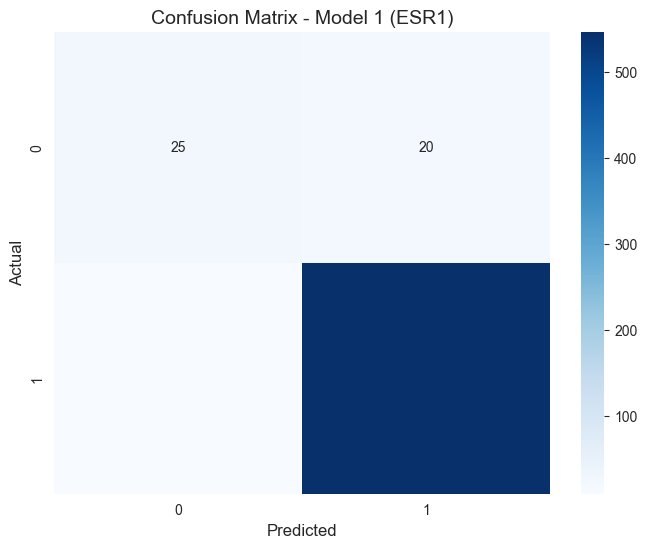

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted labels
y_test_pred = (prob_A >= 0.5).astype(int)

# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix - Model 1 (ESR1)', fontsize=14)
plt.show()


In [61]:
from sklearn.neural_network import MLPClassifier

print("========== MLP NEURAL NETWORK ==========")

alphas = [0.0001, 0.001, 0.01]

# === MLP MODEL A (ESR1 only) ===
best_auc_A = -1
best_alpha_A = None
best_prob_A_mlp = None

for a in alphas:
    mlp_A = MLPClassifier(
        hidden_layer_sizes=(100, 50),
        alpha=a,
        max_iter=1000,
        random_state=42
    )
    mlp_A.fit(train_A_scaled, y_train)
    prob = mlp_A.predict_proba(test_A_scaled)[:, 1]
    auc = roc_auc_score(y_test, prob)
    if auc > best_auc_A:
        best_auc_A = auc
        best_alpha_A = a
        best_prob_A_mlp = prob

print("=== MLP MODEL A (ESR1 only) ===")
print("Beste alpha:", best_alpha_A)
print("AUC:", best_auc_A)
print(classification_report(y_test, (best_prob_A_mlp >= 0.5).astype(int)))



========== MLP NEURAL NETWORK ==========
=== MLP MODEL A (ESR1 only) ===
Beste alpha: 0.0001
AUC: 0.9450639488409273
              precision    recall  f1-score   support

           0       0.70      0.47      0.56        45
           1       0.96      0.98      0.97       556

    accuracy                           0.95       601
   macro avg       0.83      0.73      0.77       601
weighted avg       0.94      0.95      0.94       601



In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

print("========== RANDOM FOREST ==========")

# MODEL A (ESR1 only)
rf_A = RandomForestClassifier(
    n_estimators=500,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"   # omdat er veel meer ER+ dan ER- zijn
)
rf_A.fit(X_A_train, y_train)
prob_A_rf = rf_A.predict_proba(X_A_test)[:, 1]

print("=== RF MODEL A (ESR1 only) ===")
print("AUC:", roc_auc_score(y_test, prob_A_rf))
print(classification_report(y_test, (prob_A_rf >= 0.5).astype(int)))



========== RANDOM FOREST ==========
=== RF MODEL A (ESR1 only) ===
AUC: 0.9098121502797762
              precision    recall  f1-score   support

           0       0.54      0.82      0.65        45
           1       0.98      0.94      0.96       556

    accuracy                           0.93       601
   macro avg       0.76      0.88      0.81       601
weighted avg       0.95      0.93      0.94       601



In [33]:
metadata_cols = [
    'sample_id', 'title', 'geo_accession', 'type', 'channel_count',
    'source_name_ch1', 'age at diagnosis:ch1', 'chemo treated:ch1',
    'endocrine treated:ch1', 'er prediction mgc:ch1',
    'er prediction sgc:ch1', 'er status:ch1', 'her2 prediction mgc:ch1',
    'her2 prediction sgc:ch1', 'her2 status:ch1', 'instrument model:ch1',
    'ki67 prediction mgc:ch1', 'ki67 prediction sgc:ch1', 'ki67 status:ch1',
    'lymph node group:ch1', 'lymph node status:ch1',
    'nhg prediction mgc:ch1', 'nhg:ch1', 'overall survival days:ch1',
    'overall survival event:ch1', 'pam50 subtype:ch1',
    'pgr prediction mgc:ch1', 'pgr prediction sgc:ch1', 'pgr status:ch1',
    'scan-b external id:ch1', 'tumor size:ch1'
]

In [34]:
gene_cols = [col for col in combined_bin.columns if col not in metadata_cols]

In [35]:
print("Aantal genen:", len(gene_cols))

Aantal genen: 30865


In [39]:

X_all = combined_bin[gene_cols].apply(pd.to_numeric, errors="coerce")

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42, stratify=y
)

In [41]:
variances = X_train.var(axis=0)
top500 = variances.sort_values(ascending=False).head(500).index

In [42]:
X_train_500 = X_train[top500]
X_test_500 = X_test[top500]

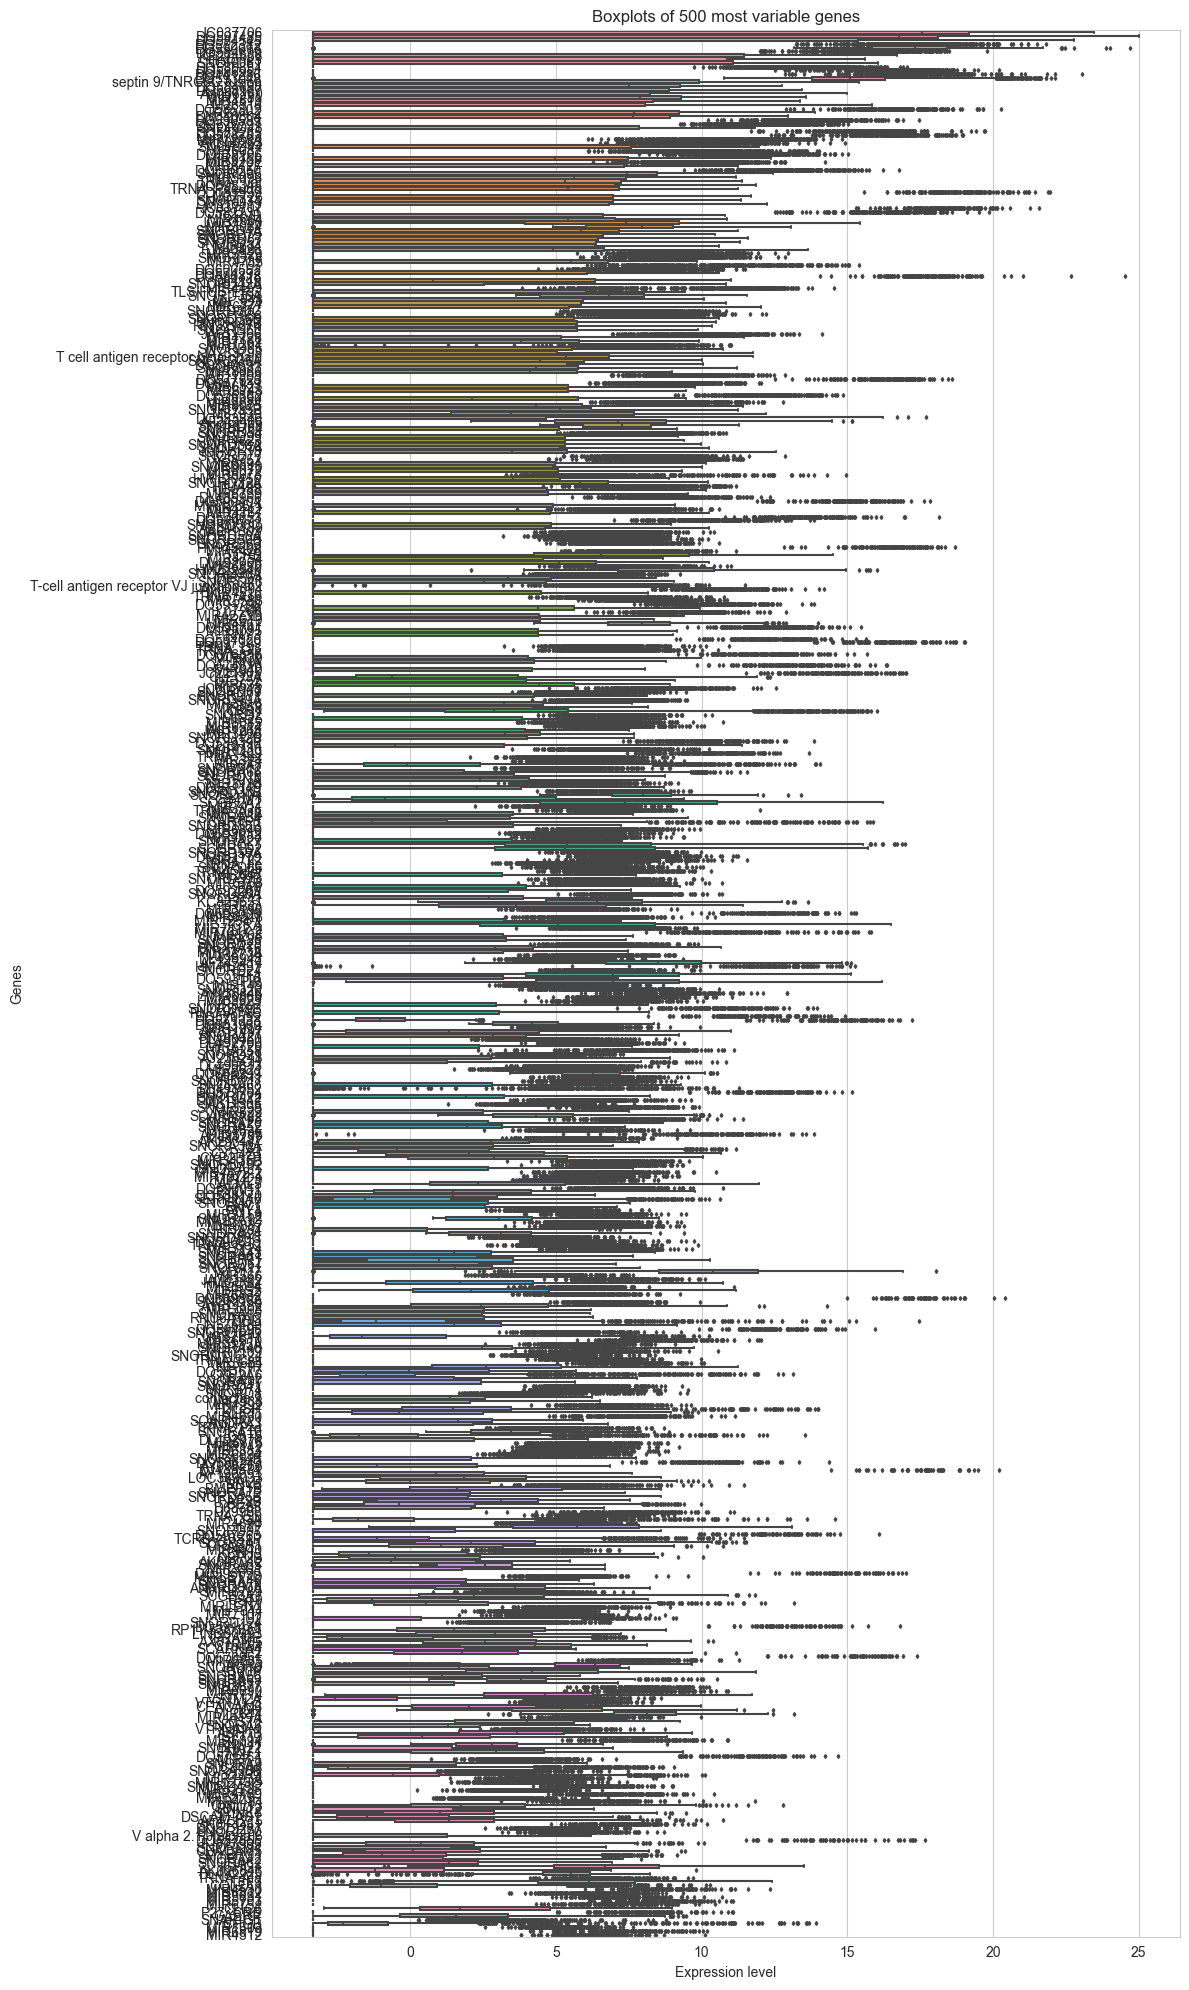

In [59]:
df_500 = X_train_500.copy()   # jouw matrix met de 500 variabele genen

outlier_counts = {}

for gene in df_500.columns:
    x = df_500[gene]

    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = (x < lower) | (x > upper)
    outlier_counts[gene] = mask.sum()

# Toon aantal outliers per gen
plt.figure(figsize=(12, 20))

sns.boxplot(
    data=X_train_500, 
    orient="h",      # horizontale boxplots
    fliersize=2      # kleine outlier-punten
)

plt.title("Boxplots of 500 most variable genes")
plt.xlabel("Expression level")
plt.ylabel("Genes")
plt.tight_layout()
plt.show()


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_500)

X_train_500_scaled = scaler.transform(X_train_500)
X_test_500_scaled = scaler.transform(X_test_500)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

clf_C = LogisticRegression(max_iter=1000)
clf_C.fit(X_train_500_scaled, y_train)
prob_C = clf_C.predict_proba(X_test_500_scaled)[:, 1]

print("=== MODEL C (Top 500 variabele genen) ===")
print("AUC:", roc_auc_score(y_test, prob_C))
print(classification_report(y_test, (prob_C >= 0.5).astype(int)))

=== MODEL C (Top 500 variabele genen) ===
AUC: 0.8782573940847324
              precision    recall  f1-score   support

           0       0.52      0.51      0.52        45
           1       0.96      0.96      0.96       556

    accuracy                           0.93       601
   macro avg       0.74      0.74      0.74       601
weighted avg       0.93      0.93      0.93       601



In [48]:

from sklearn.neural_network import MLPClassifier

alphas = [0.0001, 0.001, 0.01]
best_auc = -1
best_alpha = None
best_prob = None

for a in alphas:
    mlp_500 = MLPClassifier(
        hidden_layer_sizes=(100, 50),
        alpha=a,
        max_iter=1000,
        random_state=42
    )
    mlp_500.fit(X_train_500_scaled, y_train)
    prob = mlp_500.predict_proba(X_test_500_scaled)[:, 1]
    auc = roc_auc_score(y_test, prob)

    if auc > best_auc:
        best_auc = auc
        best_alpha = a
        best_prob = prob

print("=== MODEL C – Neural Network (500 genen) ===")
print("Beste alpha:", best_alpha)
print("AUC:", best_auc)
print(classification_report(y_test, (best_prob >= 0.5).astype(int)))

=== MODEL C – Neural Network (500 genen) ===
Beste alpha: 0.0001
AUC: 0.8757394084732214
              precision    recall  f1-score   support

           0       0.59      0.42      0.49        45
           1       0.95      0.98      0.97       556

    accuracy                           0.94       601
   macro avg       0.77      0.70      0.73       601
weighted avg       0.93      0.94      0.93       601



In [49]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

rf_500 = RandomForestClassifier(
    n_estimators=500,
    min_samples_leaf=5,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

rf_500.fit(X_train_500, y_train)
prob_500_rf = rf_500.predict_proba(X_test_500)[:, 1]

print("=== MODEL C – Random Forest (500 genen) ===")
print("AUC:", roc_auc_score(y_test, prob_500_rf))
print(classification_report(y_test, (prob_500_rf >= 0.5).astype(int)))

=== MODEL C – Random Forest (500 genen) ===
AUC: 0.9287769784172661
              precision    recall  f1-score   support

           0       0.55      0.60      0.57        45
           1       0.97      0.96      0.96       556

    accuracy                           0.93       601
   macro avg       0.76      0.78      0.77       601
weighted avg       0.94      0.93      0.93       601



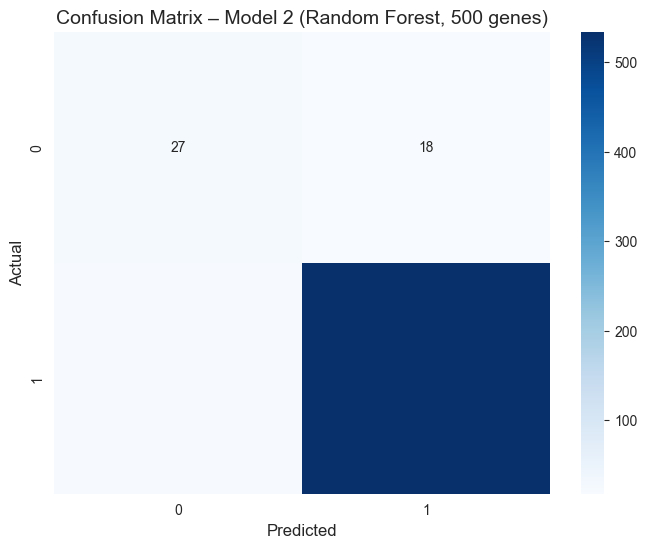

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Voorspelde labels (threshold 0.5)
y_pred_500 = (prob_500_rf >= 0.5).astype(int)

# 2. Confusion matrix
cm = confusion_matrix(y_test, y_pred_500)

# 3. Plotten
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix – Model 2 (Random Forest, 500 genes)', fontsize=14)
plt.show()